**Objective:** Demonstrate and train beta distribution skills and the ability to apply them to problem solving.

Imagine that a company is developing a prototype of a piece of machinery, but for the project to be approved and move to production and commercialization, the board defined that the demonstrations have a success rate of at least 92%.

During the presentation to the company's directors, tests were carried out and for 20 executions only 17 were successful. With that, management told the company's engineers to review the project from scratch, which could take a long time or cancel the project.

The engineers who developed the project claim that the prototype has an efficiency of 94% and that not having passed the test does not mean that its efficiency is below 92%. The engineers then asked the board for a second chance with new tests. The problem with running new tests is that the tested parts would be unusable, generating a high cost per test for the company. And if the new test was not good enough, the expenses would go beyond a new test, making a project review necessary, costing much more money and time.

What attitude should directors take in this situation? Data analysis using likelyhood and binomial and beta distributions can be a strong tool to help directors make a decision.

In [5]:
#Importing package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.stats import beta

In [6]:
#Binomial distribution
#n -> the number of trials
n = 20
#p -> probability of successes
p = 0.92
#k -> number of successes
# list of pmf values
k_value = list(range(n + 1))
prob = [binom.pmf(k, n, p) for k in k_value ]
tab1=pd.DataFrame({'Success (k)': k_value ,'Probability':prob})
tab1

,Success (k),Probability
0,0,1.152922e-22
1,1,2.651719e-20
2,2,2.897004e-18
3,3,1.998932e-16
4,4,9.769782e-15
5,5,3.595280e-13
6,6,1.033643e-11
7,7,2.377379e-10
8,8,4.442727e-09
9,9,6.812181e-08


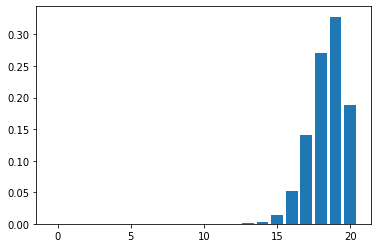

In [7]:
plt.bar(k_value, prob)
plt.show()

With the binomial distribution we found that for the test proposed by the board where 92% efficiency was required, we would have a probability of 14.14% of obtaining 17 successes, 27.10% of obtaining 18 successes, 32.81% of having 19 successes and 18.86% of having 20 successes.

We see that there is a chance that the prototype is within the required parameters and just had a bad result. So it is interesting to use the beta distribution in order to test the probability of the prototype efficiency being greater than 92%.

# **Beta distribution**

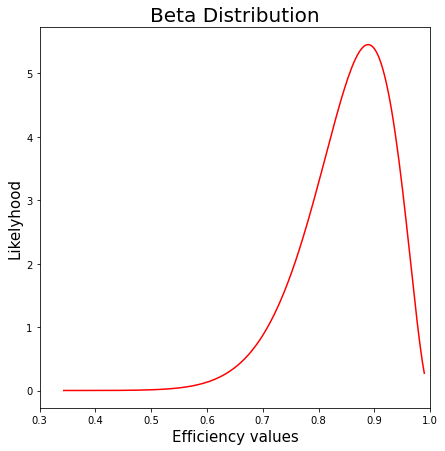

In [8]:
a=17
b=3
#create list of elements for plot.
x = np.linspace(beta.ppf(0.000001, a, b),beta.ppf(0.999, a, b), 200)
# Plot the beta distribution
plt.figure(figsize=(7,7))
plt.xlim(0.3, 1)
plt.plot(x, beta.pdf(x, a, b), 'r-')
plt.title('Beta Distribution', fontsize='20')
plt.xlabel('Efficiency values', fontsize='15')
plt.ylabel('Likelyhood', fontsize='15')
plt.show()

In [9]:
#Calculate for 92%
p = 1.0 - beta.cdf(0.92, a, b)
print(p)


0.19083796752947213


This shows that the chances of the prototype efficiency being 92% or greater is 19.08%.

In [10]:
first=0.7
last=0.92
region =1- beta.cdf(first, a, b)-(1-beta.cdf(last, a, b))
print(region)


0.7629383493412699


The prototype has a 76.29% chance of having an efficiency between 70% and 92%.